In [38]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.colors as mpcolor
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import math

%matplotlib inline

In [3]:
## colors
import palettable
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors

prism_10 = palettable.cartocolors.qualitative.Prism_10.mpl_colors

vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap

set1_9 = palettable.colorbrewer.qualitative.Set1_9.mpl_colormap

## Helper Functions for input

In [5]:
def treatment_process_centered(filename):

    df = pd.read_csv(filename, sep='\t')
    patient_val = df['patient'].tolist()
    treatment_val = df['treatment'].tolist()
    tx_start = df['tx_start_centered'].tolist()
    tx_end = df['tx_end_centered'].tolist()
    
    new_dict = {'patient': patient_val,
               'treatment': treatment_val,
               'tx_start': tx_start,
               'tx_end': tx_end}
    
    return new_dict

In [6]:
def biopsy_process_centered(filename):
    df = pd.read_csv(filename, sep='\t')
    patient_val = df['patient'].tolist()
    data_val = df['data_type'].tolist()
    time = df['time_centered'].tolist()

    
    new_dict = {'patient': patient_val,
               'data_type': data_val,
               'time': time}
    
    return new_dict

In [7]:
def treatment_process(filename):

    df = pd.read_csv(filename, sep='\t')
    patient_val = df['patient'].tolist()
    treatment_val = df['treatment'].tolist()
    tx_start = df['tx_start'].tolist()
    tx_end = df['tx_end'].tolist()
    
    new_dict = {'patient': patient_val,
               'treatment': treatment_val,
               'tx_start': tx_start,
               'tx_end': tx_end}
    
    return new_dict

In [8]:
def biopsy_process(filename):
    df = pd.read_csv(filename, sep='\t')
    patient_val = df['patient'].tolist()
    data_val = df['data_type'].tolist()
    time = df['time'].tolist()

    
    new_dict = {'patient': patient_val,
               'data_type': data_val,
               'time': time}
    
    return new_dict

In [9]:
def generate_patientYpos(patient_DF):
    """
    Return a dictionary with unique patients as keys, and 
    y positions as values, for plotting. Assumes the column with 
    the patient names is called "patient"
    """
    
    patient_ids=list(patient_DF['patient'])
    y_pos={}
    new_pos=0
    
    for patient_name in patient_ids:
        if patient_name not in y_pos:
            new_pos=new_pos+0.25
            y_pos[patient_name]=new_pos
    
    return y_pos

## CDK4 Breast Cancer Patients

In [48]:
#Input format: Patient Treatment Tx_Start Tx_End
treatment_data=pd.DataFrame(treatment_process_centered('cdk4_autopsy_treatments_CDK4_centered.dat'))
biopsy_data=pd.DataFrame(biopsy_process_centered('cdk4_biopsy_data_CDK4_centered.dat'))

#Dictonary of "Patient": y_pos
patient_pos=generate_patientYpos(treatment_data)

treat_color={'Chemotherapy': prism_10[5], 'Radiation': prism_10[2], 'CDK4 Inhibitor':'#FB0022', 
             'Hormone Therapy':prism_10[1], 'Clinical Trial': prism_10[4], 
             'SERM':prism_10[8],
             'SERD':prism_10[9],
             "AI":prism_10[0],
             'CDK4 + PIK3CA Inhibitor':prism_10[7], 
             'PIK3CA Inhibitor': prism_10[6]}

treatment = treatment_data['treatment'].unique()
start_dict = {1326:0, 1644:20, 1598:20, 1002:5400, 2974:7000, 1547:0, 1078:2000, 1534:0}
end_dict = {1326:2500, 1644:3500, 1598:4500, 1002:10500, 2974:8500, 1547:2500, 1078:7000, 1534:1500}
patients = treatment_data['patient'].unique()
treat_len = len(treatment)



sample_marker={'blood_biopsy': '.', 'death': 'x', 'pre':'v', 'post':'v', 'start':'|'}


In [18]:
print(patient_pos.keys())

dict_keys([2819, 1547, 1644, 1002, 1534, 2389, 2974, 1326, 1598, 1078, 1035])


range(0, -6500, -183)
range(0, 1300, 183)
[0, -6, -12, -18, -24, -30, -36, -42, -48, -54, -60, -66, -72, -78, -84, -90, -96, -102, -108, -114, -120, -126, -132, -138, -144, -150, -156, -162, -168, -174, -180, -186, -192, -198, -204, -210, 0, 6, 12, 18, 24, 30, 36, 42]
[0, -183, -366, -549, -732, -915, -1098, -1281, -1464, -1647, -1830, -2013, -2196, -2379, -2562, -2745, -2928, -3111, -3294, -3477, -3660, -3843, -4026, -4209, -4392, -4575, -4758, -4941, -5124, -5307, -5490, -5673, -5856, -6039, -6222, -6405, 0, 183, 366, 549, 732, 915, 1098, 1281]


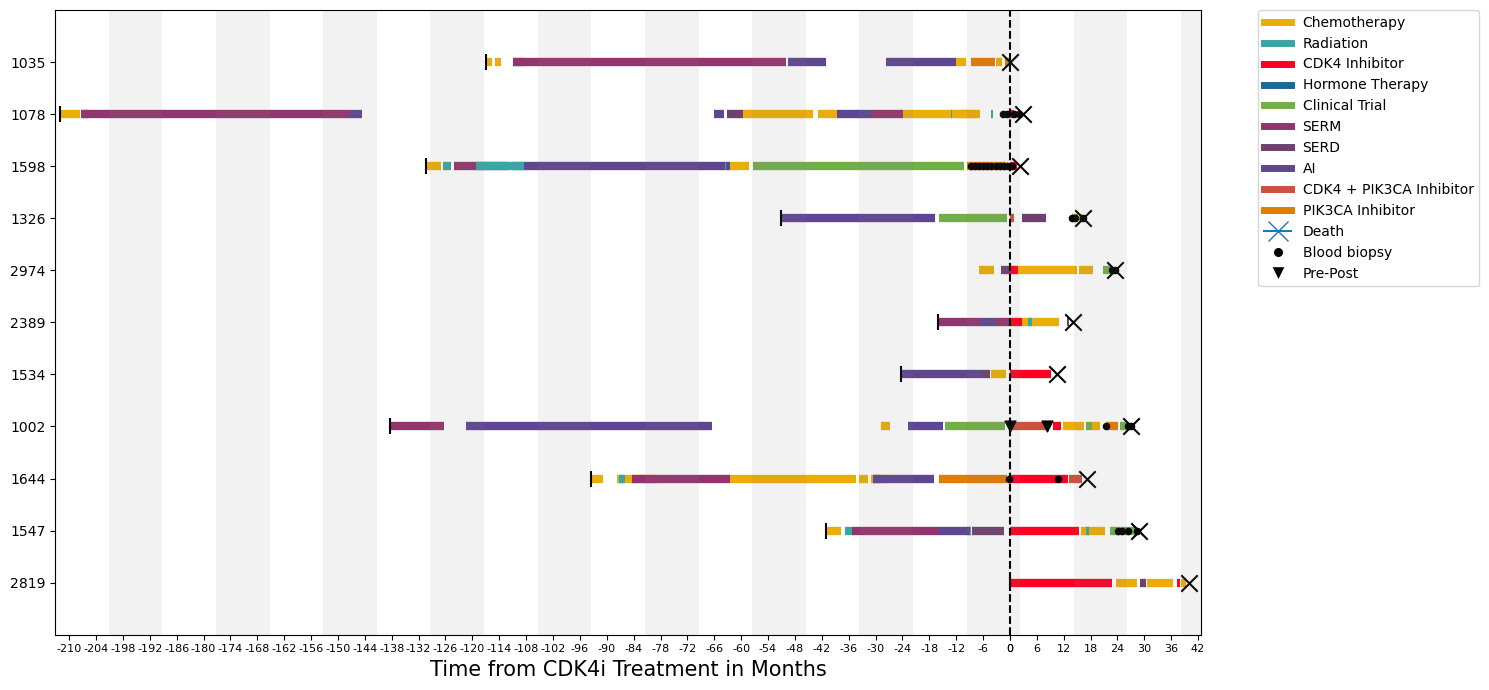

In [37]:
#Set up the figure
f=plt.figure(figsize=(15,7))
ax=plt.gca()
start_days= -6500
start_years = -17.8 #total yrs
start_month = -213.6 #total moths
#total month = days / 30.417

end_days=1300
end_years = 3.5 #total yrs
end_month = 42.7 #total moths


bottom_length=0
top_length=3.00

#Plot the treatments
for idx, row in treatment_data.iterrows():
    y_pos=patient_pos[row["patient"]]
    ax.hlines(y_pos, 
              float(row['tx_start']), 
              float(row['tx_end']), 
              colors=treat_color[row['treatment']], 
              linewidths=6, 
              zorder=-1, 
              label=str(row['treatment']))

for idx, row in biopsy_data.iterrows():
    y_pos=patient_pos[row["patient"]]
    if row['data_type'] == 'death':
        ax.scatter(float(row['time']), y_pos, marker='x', c='k', s=140, zorder=1, label=row['data_type'])
    if row['data_type'] == 'blood_biopsy':
        ax.scatter(float(row['time']), y_pos, marker='.', c='k', s=80, zorder=1, label=row['data_type'])
    if row['data_type'] == 'pre':
        ax.scatter(float(row['time']), y_pos, marker='v', c='k', s=60, zorder=1, label=row['data_type'])
    if row['data_type'] == 'post':
        ax.scatter(float(row['time']), y_pos, marker='v', c='k', s=60, zorder=1, label=row['data_type'])
    if row['data_type'] == 'start':
        ax.scatter(float(row['time']), y_pos, marker='|', c='k', s=140, zorder=1, label=row['data_type'])


#Plot shading each n days    
counter=-1
n=365
for i in range(start_days, end_days, n):
    counter=counter+1

    #Ignore every other chromosome for the patches
    if counter%2==0:continue

    newpatch=mpatches.Rectangle([i, bottom_length], n, top_length-bottom_length, ec="none",color='gray', alpha=0.1)
    ax.add_patch(newpatch)


ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)    

ax.set_xlim(start_days, end_days)
ax.set_ylim(bottom_length, top_length)
ax.set_yticks(list(patient_pos.values()),labels=list(patient_pos.keys()))



m = 183
x_ticks=list(range(0, start_days, -m)) + list(range(0, end_days, m))
x_ticks_label= np.array(x_ticks)/30.5
x_ticks_label_int = [int(x) for x in x_ticks_label]

ax.set_xticks(x_ticks, labels=x_ticks_label_int, fontsize=8)

ax.set_xlabel('Time from CDK4i Treatment in Months', fontsize=15)


#Line that marks the start of CDK4
ax.vlines(0, bottom_length, top_length, color='black', linestyles='--')


legend_elements=[]

#Add the treatments
for farmac in treat_color:
    new_legend=Line2D([0], [0], color=treat_color[farmac], lw=5, label=farmac)
    legend_elements.append(new_legend)

#Add the biopsy dots
legend_elements.append(Line2D([0], [0], marker='x', label='Death', markerfacecolor='black', markersize=15))
legend_elements.append(Line2D([0], [0], marker='.', color='w', label='Blood biopsy', markerfacecolor='k', markersize=15))
legend_elements.append(Line2D([0], [0], marker='v', color='w', label='Pre-Post', markerfacecolor='k', markersize=10))
#ax.legend(handles=legend_elements, loc='lower right')
    
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#f.savefig('CDK4_Riverplot_centered_biopsy.png')
                       
#f.savefig('Autopsy_CDK4_Riverplot.png')

## CDK4 All Samples: Autopsy and Pre Post

In [51]:
#Input format: Patient Treatment Tx_Start Tx_End
treatment_data=pd.DataFrame(treatment_process_centered('cdk4_all_treatments_CDK4_centered_updated_0302.txt'))
biopsy_data=pd.DataFrame(biopsy_process_centered('cdk4_all_biopsy_data_CDK4_centered_updated_0302.txt'))

#Dictonary of "Patient": y_pos
patient_pos=generate_patientYpos(treatment_data)

# updated colors
treat_color={'Chemotherapy': prism_10[5], 'Radiation': prism_10[2], 'CDK4 Inhibitor + ET':'#FB0022', 
             'ET':'#442259',
             'Other Targeted Therapy': '#808080',
             'CDK4 + PIK3CA Inhibitor + ET':prism_10[7], 
             'PIK3CA Inhibitor + ET': prism_10[6]}

treatment = treatment_data['treatment'].unique()
start_dict = {1326:0, 1644:20, 1598:20, 1002:5400, 2974:7000, 1547:0, 1078:2000, 1534:0}
end_dict = {1326:2500, 1644:3500, 1598:4500, 1002:10500, 2974:8500, 1547:2500, 1078:7000, 1534:1500}
patients = treatment_data['patient'].unique()

treat_len = len(treatment)

sample_marker={'blood_biopsy': '.', 'death': 'x', 'pre':'v', 'post':'v', 'start':'|'}


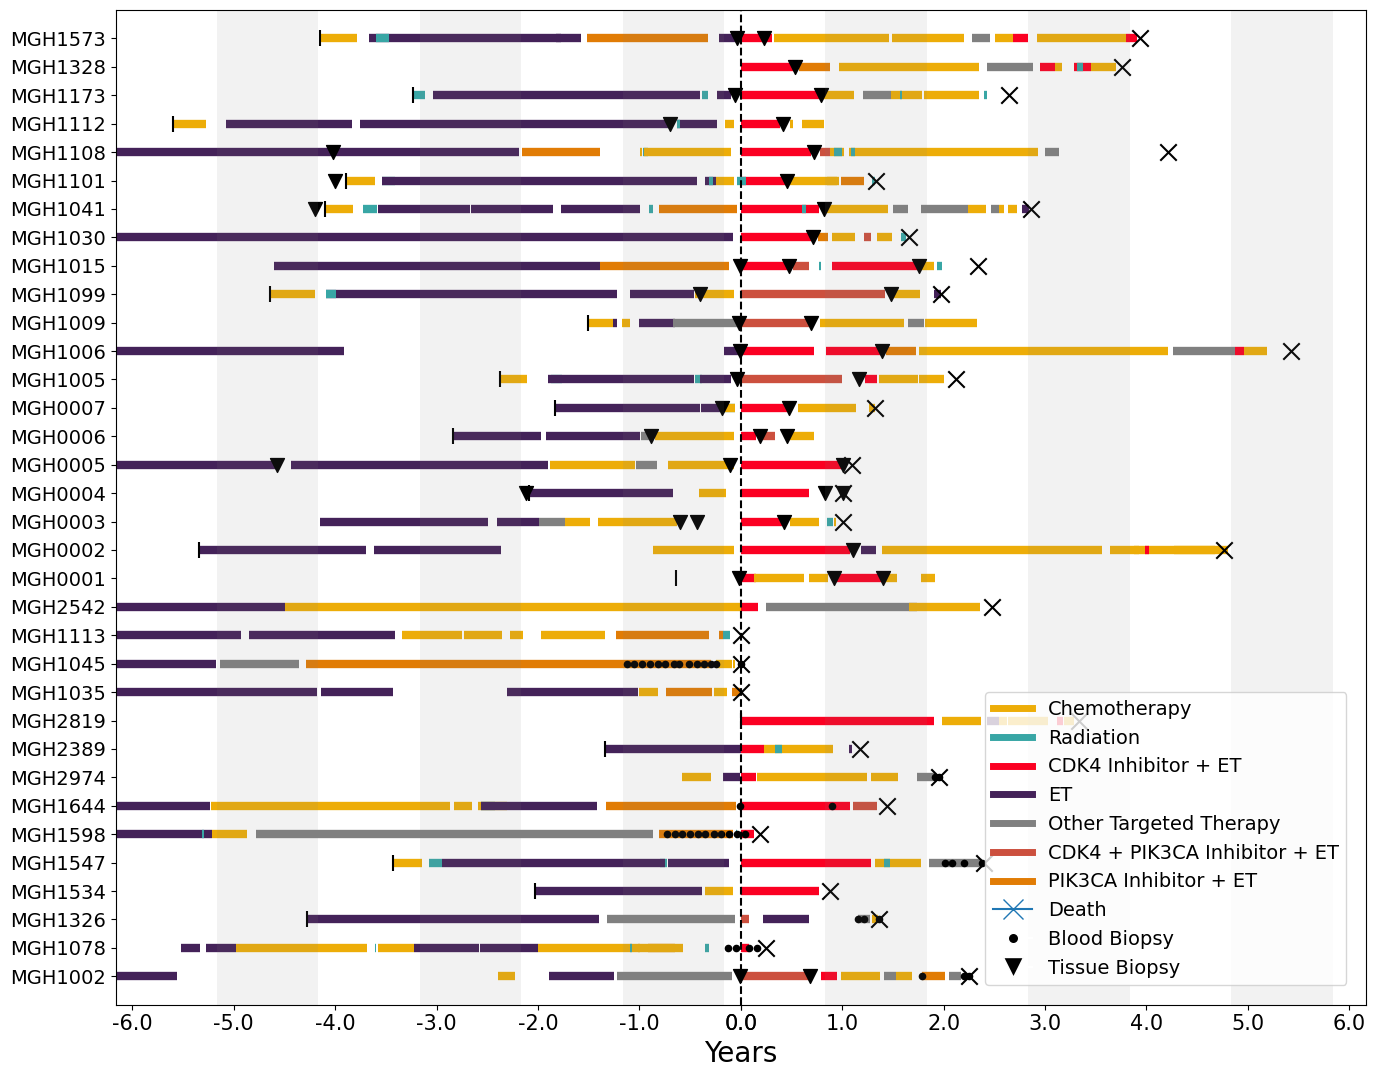

In [56]:

plt.rcParams.update({'font.size': 14})
plt.rcParams['svg.fonttype'] = 'none'


f=plt.figure(figsize=(14,11))
ax=plt.gca()

start_days = -2250
start_years = -17.8 #total yrs
start_month = -213.6 #total moths
#total month = days / 30.417



end_days = 2250
end_years = 3.5 #total yrs
end_month = 42.7 #total moths


bottom_length=0
top_length=8.75

#Plot the treatments
for idx, row in treatment_data.iterrows():
    y_pos=patient_pos[row["patient"]]
    #y_pos=1.0
    ax.hlines(y_pos, 
              float(row['tx_start']), 
              float(row['tx_end']), 
              colors=treat_color[row['treatment']], 
              linewidths=6, 
              zorder=-1, 
              label=str(row['treatment']))

for idx, row in biopsy_data.iterrows():
    y_pos=patient_pos[row["patient"]]
    if row['data_type'] == 'death':
        ax.scatter(float(row['time']), y_pos, marker='x', c='k', s=140, zorder=1, label=row['data_type'])
    if row['data_type'] == 'blood_biopsy':
        ax.scatter(float(row['time']), y_pos, marker='.', c='k', s=80, zorder=1, label=row['data_type'])
    if row['data_type'] == 'pre':
        ax.scatter(float(row['time']), y_pos, marker='v', c='k', s=100, zorder=1, label=row['data_type'])
    if row['data_type'] == 'post':
        ax.scatter(float(row['time']), y_pos, marker='v', c='k', s=100, zorder=1, label=row['data_type'])
    if row['data_type'] == 'start':
        ax.scatter(float(row['time']), y_pos, marker='|', c='k', s=140, zorder=1, label=row['data_type'])


#Plot shading each n days    
counter=-1
n=365
for i in range(start_days, end_days, n):
    counter=counter+1

    #Ignore every other chromosome for the patches
    if counter%2==0:continue

    newpatch=mpatches.Rectangle([i, bottom_length], n, top_length-bottom_length, ec="none",color='gray', alpha=0.1)
    ax.add_patch(newpatch)


ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)    

ax.set_xlim(start_days, end_days)
ax.set_ylim(bottom_length, top_length)
ax.set_yticks(list(patient_pos.values()))
ax.set_yticklabels(list(patient_pos.keys()))


## year labels
m = 365
x_ticks=list(range(0, start_days, -m)) + list(range(0, end_days, m))
x_ticks_label=np.array(x_ticks)/365
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks_label, fontsize=15)
ax.set_xlabel('Years', fontsize=20)   

#Line that marks the start of CDK4 -- centered each patient on TX start time
ax.vlines(0, bottom_length, top_length, color='black', linestyles='--')

legend_elements=[]

#Add the treatments
for farmac in treat_color:
    new_legend=Line2D([0], [0], color=treat_color[farmac], lw=5, label=farmac)
    legend_elements.append(new_legend)

#Add the biopsy dots
legend_elements.append(Line2D([0], [0], marker='x', label='Death', markerfacecolor='black', markersize=15))
legend_elements.append(Line2D([0], [0], marker='.', color='w', label='Blood Biopsy', markerfacecolor='k', markersize=15))
legend_elements.append(Line2D([0], [0], marker='v', color='w', label='Tissue Biopsy', markerfacecolor='k', markersize=15))
    

ax.legend(handles=legend_elements, loc=4, borderaxespad=1.0)

plt.tight_layout()
f.savefig('CDK4_Riverplot_centered_biopsy_072123.png')

                       
f.savefig('All_CDK4_Riverplot_updated_072123.svg', format='svg', )